# Capstone Project

In [1]:
# Primary Libraries
import urllib, json
import urllib3
import requests
import pandas as pd
from io import StringIO
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# settings to display all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# Clustering Libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score, adjusted_rand_score

In [2]:
clean_df = pd.read_csv('data/clean_df.csv')

In [92]:
model_df = clean_df.copy()

model_df.dropna(inplace=True)

model_stocks = model_df[['Index', 'Symbol', 'Name', 'Description', 'Exchange', 'Country',
       'Sector', 'Industry', 'FiscalYearEnd', 'LatestQuarter','DividendDate', 'ExDividendDate', 'LastSplitFactor',
       'LastSplitDate', 'Market-Cap']]

model_df.drop(['Index', 'Symbol', 'Name', 'Description', 'Exchange', 'Country',
       'Sector', 'Industry', 'FiscalYearEnd', 'LatestQuarter','DividendDate', 'ExDividendDate', 'LastSplitFactor',
       'LastSplitDate', 'Market-Cap'], inplace=True, axis =1)

# Scale for subsequent iterations
scaler = StandardScaler()
model_df = pd.DataFrame(scaler.fit_transform(model_df), columns = model_df.columns)

In [94]:
# Determining the number of clusters
k_means_3 = KMeans(n_clusters=3).fit(model_df)
k_means_4 = KMeans(n_clusters=4).fit(model_df)
k_means_5 = KMeans(n_clusters=5).fit(model_df)
k_means_6 = KMeans(n_clusters=6).fit(model_df)
k_means_7 = KMeans(n_clusters=7).fit(model_df)
k_means_8 = KMeans(n_clusters=8).fit(model_df)
k_means_9 = KMeans(n_clusters=9).fit(model_df)
k_means_10 = KMeans(n_clusters=10).fit(model_df)
k_means_11 = KMeans(n_clusters=11).fit(model_df)
k_means_12 = KMeans(n_clusters=12).fit(model_df)
k_means_13 = KMeans(n_clusters=13).fit(model_df)
k_means_14 = KMeans(n_clusters=14).fit(model_df)

k_list = [k_means_3, k_means_4,k_means_5, k_means_6, k_means_7, k_means_8, 
          k_means_9, k_means_10, k_means_11, k_means_12, k_means_13, k_means_14]

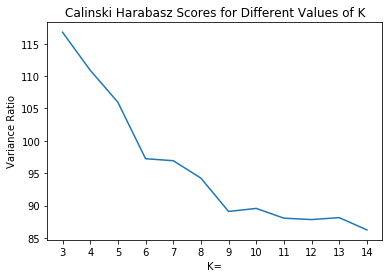

In [95]:
# Calculate Calinski-Harabasz score for different n of clusters
CH_score = []
for i in k_list:
    label = i.labels_
    CH_score.append(calinski_harabasz_score(model_df, label))

# Plot CH elbow graph
plt.plot(list(range(3,15)), CH_score)
plt.xticks(list(range(3,15)))
plt.title('Calinski Harabasz Scores for Different Values of K')
plt.ylabel('Variance Ratio')
plt.xlabel('K=')
plt.show()

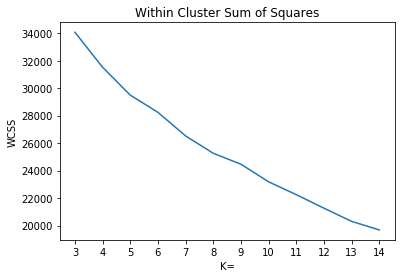

In [96]:
# Calculate the Within Cluster Sum of Squares for different n clusters
wcss_score = []
for i in k_list:
    wcss_score.append(i.inertia_)

# Plot WCSS elbow graph
plt.plot(list(range(3,15)), wcss_score)
plt.xticks(list(range(3,15)))
plt.title('Within Cluster Sum of Squares')
plt.ylabel('WCSS')
plt.xlabel('K=')
plt.show()

In [97]:
cluster7_preds = k_means_7.predict(model_df)

In [98]:
testtest = model_df.copy()

In [100]:
testtest['preds'] = cluster7_preds

In [101]:
testtest['preds'].value_counts()

1    647
0    183
4     97
6     68
2      4
5      1
3      1
Name: preds, dtype: int64

In [102]:
testtest[['Symbol', 'Name']] = model_stocks[['Symbol', 'Name']]

In [106]:
testtest

,MarketCapitalization,EBITDA,PERatio,PEGRatio,BookValue,DividendPerShare,DividendYield,EPS,RevenuePerShareTTM,ProfitMargin,OperatingMarginTTM,ReturnOnAssetsTTM,ReturnOnEquityTTM,RevenueTTM,GrossProfitTTM,DilutedEPSTTM,QuarterlyEarningsGrowthYOY,QuarterlyRevenueGrowthYOY,AnalystTargetPrice,TrailingPE,ForwardPE,PriceToSalesRatioTTM,PriceToBookRatio,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,SharesFloat,SharesShort,SharesShortPriorMonth,ShortRatio,ShortPercentOutstanding,ShortPercentFloat,PercentInsiders,PercentInstitutions,ForwardAnnualDividendRate,ForwardAnnualDividendYield,PayoutRatio,preds,Symbol,Name
0,0.402336,-0.080865,0.046726,-0.035930,-0.065570,-0.050555,-0.335089,-0.076497,-0.065891,0.051406,0.161742,0.373071,0.122690,-0.081201,-0.084703,-0.076497,-0.073646,-0.179462,0.586224,0.046726,0.260488,0.830257,0.205768,0.711525,1.492882,-0.142936,0.457655,0.354943,0.497224,0.396421,-0.084475,-0.018596,-0.170560,-0.125579,-0.659512,-0.473786,-0.493350,-0.544604,0.658048,-0.413396,-0.535264,-0.188695,0,A,Agilent Technologies Inc
1,-0.283513,-0.080738,-0.128404,-0.056784,-0.064868,-0.051204,-0.299704,-0.115980,-0.060804,-0.474084,-0.408377,-0.215306,0.122682,-0.079862,-0.087148,-0.115980,-0.066307,-0.078445,-0.322560,-0.128404,-0.179809,-0.534275,-0.171389,-0.625968,-0.689373,2.327673,-0.271688,-0.423710,-0.251803,-0.303669,-0.216059,-0.198668,0.734468,0.758395,-0.793784,1.475227,0.985604,-0.502512,0.277547,-0.888766,-0.659693,-0.425632,4,AA,Alcoa Corporation
2,-0.436918,-0.082210,-0.210163,-0.044164,-0.064503,-0.051463,-0.307287,-0.083347,-0.061181,-0.402147,-0.276811,0.237039,-8.107101,-0.082541,-0.087610,-0.083347,-0.072794,-0.465954,-0.462544,-0.210163,-0.146653,-0.612355,-0.235970,-0.686692,-1.062757,1.396766,-0.356731,-0.383139,-0.374501,-0.367092,-0.391183,-0.436025,-0.451253,-0.458104,-0.460686,-0.148951,-0.205171,-0.431614,0.807943,-0.644986,-0.310802,-0.348534,1,NaN,NaN
3,-0.386588,-0.083326,0.051962,-0.032467,-0.067220,-0.051172,-0.328771,-0.154066,-0.067338,-0.001231,-0.047789,0.971281,0.122691,-0.082947,-0.089148,-0.154066,-0.075671,-0.364937,-0.271947,0.051962,-0.327763,0.741436,0.200332,0.508460,1.414049,-0.924061,-0.105842,-0.032583,-0.130887,-0.133943,-0.368774,-0.421839,-0.371124,-0.373809,1.638604,0.175885,0.172724,0.695448,0.026592,-0.657175,-0.525505,-0.087150,1,NaN,NaN
4,-0.202633,-0.081549,-0.116187,-0.046742,-0.058961,-0.048959,-0.294649,0.188407,-0.045799,-0.403463,-0.464414,-0.154665,0.122688,-0.079730,-0.081971,0.188407,-0.076728,-0.509010,1.000364,-0.116187,-0.033103,-0.459088,-0.086749,-0.529902,0.044316,0.274201,0.691295,0.712261,0.730638,0.740303,-0.356738,-0.389655,-0.117115,-0.139191,0.381096,1.150391,0.923075,-0.534217,1.097897,1.549028,-0.203451,-0.151085,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.218155,-0.079804,-0.082557,-0.042332,-0.073373,-0.048604,-0.196077,-0.026762,-0.065775,0.275112,0.761097,2.642991,-8.107101,-0.081159,-0.084943,-0.026762,-0.068440,-0.048637,0.274575,-0.082557,0.114494,0.470843,-0.303595,0.643186,0.664234,-0.147768,0.205047,0.273276,0.243104,0.226181,-0.092511,-0.029145,-0.118652,-0.089515,-0.385803,-0.473786,-0.441695,-0.550220,0.343338,0.330131,-0.264446,0.137252,0,NaN,NaN
997,0.010330,-0.081013,-0.102359,-0.038562,-0.065700,-0.051204,-0.321188,-0.113624,-0.065431,-0.198619,-0.359649,0.205900,0.122690,-0.080124,-0.086697,-0.113624,-0.074622,-0.128126,3.426246,-0.102359,0.122338,-0.179613,-0.100883,-0.348902,0.095379,-0.481155,-0.171688,-0.069992,-0.178074,-0.156796,0.049728,0.163961,0.525444,0.938692,-0.044959,-0.148951,-0.142642,-0.550100,0.614640,-0.596231,-0.462070,-0.119744,1,NaN,NaN
998,0.105646,-0.079657,-0.051076,-0.044418,-0.057528,-0.050235,-0.316133,-0.024930,-0.063376,-0.145982,-0.072153,-0.420172,0.122680,-0.080660,-0.081289,-0.024930,-0.0

In [103]:
testtest[testtest['preds']== 6]

,MarketCapitalization,EBITDA,PERatio,PEGRatio,BookValue,DividendPerShare,DividendYield,EPS,RevenuePerShareTTM,ProfitMargin,OperatingMarginTTM,ReturnOnAssetsTTM,ReturnOnEquityTTM,RevenueTTM,GrossProfitTTM,DilutedEPSTTM,QuarterlyEarningsGrowthYOY,QuarterlyRevenueGrowthYOY,AnalystTargetPrice,TrailingPE,ForwardPE,PriceToSalesRatioTTM,PriceToBookRatio,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,SharesFloat,SharesShort,SharesShortPriorMonth,ShortRatio,ShortPercentOutstanding,ShortPercentFloat,PercentInsiders,PercentInstitutions,ForwardAnnualDividendRate,ForwardAnnualDividendYield,PayoutRatio,preds,Symbol,Name
7,3.178510,-0.039093,-0.071146,-0.044710,-0.067258,-0.043580,0.179257,-0.054684,-0.064444,-0.110891,0.814698,0.305874,0.122714,-0.066448,-0.036778,-0.054684,-0.076862,-0.045325,0.212633,-0.071146,-0.186940,0.034796,0.533566,0.163055,0.180483,-0.489208,0.126308,0.156570,0.139883,0.168728,1.578778,2.215331,0.815729,0.839320,-0.837680,-0.473786,-0.602096,-0.553240,-0.073450,2.280366,0.482132,0.125969,6,NaN,NaN
8,0.361989,-0.050050,-0.160758,-0.040124,-0.067642,-0.050994,1.914385,-0.209168,-0.068119,0.305817,0.322544,0.397655,0.122689,-0.062485,-0.037497,-0.209168,-0.064596,-0.022140,-0.708897,-0.160758,-0.004225,-0.578892,-0.144589,-0.685130,-1.050753,-0.287887,-0.547505,-0.505746,-0.523372,-0.536498,17.445188,6.326168,4.179140,5.045762,-0.755051,-0.798621,-0.520536,-0.560668,-2.076000,-0.882671,-0.532824,0.240050,6,NaN,NaN
10,3.433157,-0.064807,-0.048391,-0.033867,-0.065069,-0.049024,-0.216297,-0.061577,-0.065528,0.042633,0.088650,0.182955,0.122689,-0.070632,-0.056896,-0.061577,-0.065976,0.047412,0.251915,-0.048391,0.111286,0.357236,0.026920,0.235104,0.512838,-0.740456,0.173127,0.371365,0.220002,0.211159,1.585184,2.238975,0.615372,0.618618,-0.522658,-0.473786,-0.632001,-0.516704,0.151052,0.208241,-0.288844,0.033200,6,NaN,NaN
76,0.611915,0.385058,-0.192374,-0.048435,-0.054543,-0.051140,-0.106351,-0.151885,-0.025507,-0.219235,-0.140372,-0.002245,0.122706,0.231859,0.816479,-0.151885,-0.066576,-0.600092,-0.582851,-0.192374,-0.087115,-0.703179,-0.048750,-0.790899,-1.181097,-1.337977,-0.456731,-0.421075,-0.429183,-0.453881,3.325205,1.841845,0.503550,0.115719,0.066073,-0.798621,-0.623845,-0.560607,-2.064131,-0.644986,-0.096100,-0.095925,6,NaN,NaN
95,-0.176743,0.068818,-0.191972,-0.043933,-0.048263,-0.045001,7.462244,-0.191411,-0.034702,-0.353897,-0.482444,-0.216945,0.122686,0.077633,0.039871,-0.191411,-0.072785,-0.308632,-0.648893,-0.191972,-0.174640,-0.708880,-0.203408,-0.798729,-1.181993,0.156629,-0.516445,-0.488227,-0.489518,-0.503631,2.027762,1.957252,0.265843,0.157970,-0.760216,-0.798621,-0.670063,-0.560668,-2.215721,-0.705931,0.426016,0.240050,6,NaN,NaN
112,2.087323,-0.025761,-0.189757,-0.054553,-0.064849,-0.046924,0.325852,-0.021876,-0.065307,0.156679,1.477401,1.856304,0.122694,-0.064122,0.000123,-0.021876,-0.064166,0.562435,-0.280669,-0.189757,-0.199239,-0.254387,-0.167312,-0.378190,-0.832528,-0.395795,-0.205327,-0.222175,-0.200070,-0.170982,2.443968,3.419241,0.029209,-0.256809,-0.804112,-0.798621,-0.746185,-0.559822,-2.227590,2.780114,2.146073,-0.384764,6,NaN,NaN
136,2.189897,-0.025761,-0.186736,-0.054553,-0.064849,-0.046924,0.292994,-0.021876,-0.065307,0.156679,1.477401,1.856304,0.122694,-0.064122,0.000123,-0.021876,-0.064166,0.562435,-0.271575,-0.186736,-0.217422,-0.236003,-0.160571,-0.356517,-0.813894,-0.395795,-0.128650,-0.146918,-0.180286,-0.104607,2.445967,3.419241,1.876047,1.639285,0.151284,-0.473786,-0.553160,-0.560668,-2.176043,2.780114,1.999686,-0.384764,6,NaN,NaN
143,1.369749,-0.051081,-0.194254,-0.052629,-0.064291,-0.051444,-0.306023,-0.104419,-0.060441,-0.462679,-0.985805,-1.124913,0.122682,-0.021519,-0.046718,-0.104419,0.589981,0.570715,-0.479390,-0.194254,-0.179631,-0.612974,-0.238199,-0.672048,-0.588144,-0.484376,-0.400800,-0.401756,-0.383532,-0.391742,3.359698,4.651086,0.511009,0.664812,-0.946131,-0.798621,-0.721717,-0.560547,-2.094991,-0.090388,0.44

In [104]:
testtest[testtest['preds']== 4]

,MarketCapitalization,EBITDA,PERatio,PEGRatio,BookValue,DividendPerShare,DividendYield,EPS,RevenuePerShareTTM,ProfitMargin,OperatingMarginTTM,ReturnOnAssetsTTM,ReturnOnEquityTTM,RevenueTTM,GrossProfitTTM,DilutedEPSTTM,QuarterlyEarningsGrowthYOY,QuarterlyRevenueGrowthYOY,AnalystTargetPrice,TrailingPE,ForwardPE,PriceToSalesRatioTTM,PriceToBookRatio,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,SharesFloat,SharesShort,SharesShortPriorMonth,ShortRatio,ShortPercentOutstanding,ShortPercentFloat,PercentInsiders,PercentInstitutions,ForwardAnnualDividendRate,ForwardAnnualDividendYield,PayoutRatio,preds,Symbol,Name
1,-0.283513,-0.080738,-0.128404,-0.056784,-0.064868,-0.051204,-0.299704,-0.115980,-0.060804,-0.474084,-0.408377,-0.215306,0.122682,-0.079862,-0.087148,-0.115980,-0.066307,-0.078445,-0.322560,-0.128404,-0.179809,-0.534275,-0.171389,-0.625968,-0.689373,2.327673,-0.271688,-0.423710,-0.251803,-0.303669,-0.216059,-0.198668,0.734468,0.758395,-0.793784,1.475227,0.985604,-0.502512,0.277547,-0.888766,-0.659693,-0.425632,4,AA,Alcoa Corporation
31,-0.378449,-0.082435,-0.162571,0.239951,-0.067174,-0.051272,-0.236517,-0.151667,-0.064885,-0.386356,-0.349903,0.477962,0.122693,-0.081694,-0.087503,-0.151667,-0.079801,-0.023796,-0.437201,-0.162571,-0.158240,-0.531383,-0.126106,-0.590822,-0.668769,0.556050,-0.349510,-0.409396,-0.371490,-0.347000,-0.236808,-0.278136,2.008040,1.754376,-0.099185,4.073910,4.171880,-0.148807,1.468225,-0.449963,0.045408,0.011888,4,NaN,NaN
35,-0.399024,-0.083233,-0.056848,-0.054553,-0.067556,-0.051773,-0.389430,-0.200791,-0.068403,0.077724,0.074031,-0.328392,0.122680,-0.082951,-0.089165,-0.200791,-0.054418,5.056875,-0.606480,-0.056848,-0.025616,0.503893,-0.195634,0.248772,0.087316,-0.429617,-0.432548,-0.439429,-0.467338,-0.462868,-0.136994,-0.149422,1.235841,1.444086,-0.034631,1.475227,1.330875,0.380211,-1.224450,-0.876577,-0.608458,-0.383134,4,NaN,NaN
45,-0.431785,-0.083443,-0.142030,-0.036037,-0.063405,-0.051665,-0.370474,-0.140978,-0.061866,-0.496016,-0.875680,-0.939714,0.122680,-0.082576,-0.089013,-0.140978,0.028820,-0.383153,-0.353941,-0.142030,-0.086937,-0.572282,-0.238579,-0.656623,-0.343581,1.013451,-0.309453,-0.363908,-0.338558,-0.317278,-0.388005,-0.434218,-0.290688,-0.331254,1.610200,1.150391,1.039978,-0.276653,0.768265,-0.705931,-0.488908,-0.425632,4,NaN,NaN
56,-0.388881,-0.083395,0.228099,-0.165905,-0.056712,-0.051786,-0.398277,-0.103241,-0.058391,-0.494261,-1.162201,-1.180637,0.122677,-0.082734,-0.089205,-0.103241,-0.059874,3.604545,1.250518,0.228099,-0.133997,-0.115166,-0.132249,-0.132365,0.096275,0.920038,0.984534,0.523460,0.656848,0.783441,-0.407797,-0.463003,-0.435935,-0.461422,0.332035,0.825556,0.770830,0.371757,0.602431,0.817690,0.255231,-0.425632,4,ACC,American Campus Communities Inc
77,-0.358428,-0.081727,-0.231710,-0.054553,-0.022511,-0.046487,-0.179648,1.204047,-0.045331,0.204930,0.259198,-0.629956,0.122685,-0.081720,-0.087659,1.204047,-0.075984,-0.573595,-0.085301,-0.231710,-0.327763,-0.478298,-0.262389,-0.595703,-1.202687,-0.494040,0.547684,0.052948,0.630121,0.443025,-0.397754,-0.484069,-0.497978,-0.505632,-0.538150,-0.473786,4.797173,0.860917,0.823882,1.110225,-0.237608,-0.307038,4,NaN,NaN
79,-0.412787,-0.082764,-0.213183,-0.243244,-0.065627,-0.051786,-0.398277,-0.027766,-0.060606,-0.318806,-0.476109,0.010867,0.122699,-0.081993,-0.086246,-0.027766,0.087597,-0.212583,-0.345518,-0.213183,-0.165192,-0.588187,-0.172041,-0.660137,-0.723415,1.023114,-0.299138,-0.400614,-0.310971,-0.305017,-0.361188,-0.396058,0.206744,0.034479,-0.419371,3.099404,2.513494,-0.453294,0.985985,-0.401207,1.023767,-0.425632,4,NaN,NaN
90,-0.348249,-0.082748,-0.060003,-0.065018,-0.058910,-0.049969,-0.245363,-0.087011,-0.063192,-0.323192,-0.442487,-0.659456,0.122678,-0.082363,-0.088234,-0.087011,-0.066370,-0.424553,0.041118,-0.060003,-0.049146,-0.226502,-0.210094,-0.231554,0.068504,0.206557,-0.022117,0.066735,0.014482,0.014600,-0.359314,-0.398671,0.076701,-0.318785

In [105]:
testtest[testtest['preds']== 1]

,MarketCapitalization,EBITDA,PERatio,PEGRatio,BookValue,DividendPerShare,DividendYield,EPS,RevenuePerShareTTM,ProfitMargin,OperatingMarginTTM,ReturnOnAssetsTTM,ReturnOnEquityTTM,RevenueTTM,GrossProfitTTM,DilutedEPSTTM,QuarterlyEarningsGrowthYOY,QuarterlyRevenueGrowthYOY,AnalystTargetPrice,TrailingPE,ForwardPE,PriceToSalesRatioTTM,PriceToBookRatio,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,SharesFloat,SharesShort,SharesShortPriorMonth,ShortRatio,ShortPercentOutstanding,ShortPercentFloat,PercentInsiders,PercentInstitutions,ForwardAnnualDividendRate,ForwardAnnualDividendYield,PayoutRatio,preds,Symbol,Name
2,-0.436918,-0.082210,-0.210163,-0.044164,-0.064503,-0.051463,-0.307287,-0.083347,-0.061181,-0.402147,-0.276811,0.237039,-8.107101,-0.082541,-0.087610,-0.083347,-0.072794,-0.465954,-0.462544,-0.210163,-0.146653,-0.612355,-0.235970,-0.686692,-1.062757,1.396766,-0.356731,-0.383139,-0.374501,-0.367092,-0.391183,-0.436025,-0.451253,-0.458104,-0.460686,-0.148951,-0.205171,-0.431614,0.807943,-0.644986,-0.310802,-0.348534,1,NaN,NaN
3,-0.386588,-0.083326,0.051962,-0.032467,-0.067220,-0.051172,-0.328771,-0.154066,-0.067338,-0.001231,-0.047789,0.971281,0.122691,-0.082947,-0.089148,-0.154066,-0.075671,-0.364937,-0.271947,0.051962,-0.327763,0.741436,0.200332,0.508460,1.414049,-0.924061,-0.105842,-0.032583,-0.130887,-0.133943,-0.368774,-0.421839,-0.371124,-0.373809,1.638604,0.175885,0.172724,0.695448,0.026592,-0.657175,-0.525505,-0.087150,1,NaN,NaN
5,-0.410023,-0.083212,0.591449,0.113592,-0.064772,-0.050074,-0.048218,-0.203278,-0.067917,-0.420131,0.293308,-0.705347,0.122675,-0.083000,-0.089032,-0.203278,-0.075267,-0.412961,-0.437425,0.591449,-0.327763,0.714584,-0.204223,1.242617,0.500297,0.204946,-0.337361,-0.347487,-0.304028,-0.321194,-0.359610,-0.404696,-0.396000,-0.414455,0.282974,-0.148951,-0.158954,-0.479685,1.047367,-0.157428,0.106403,0.374190,1,NaN,NaN
6,0.781260,-0.077702,-0.190294,-0.052452,-0.067287,-0.050326,-0.054537,-0.096348,-0.066786,0.235634,-0.421046,-0.339865,0.122679,-0.074389,-0.076126,-0.096348,-0.063745,-0.258951,-0.445475,-0.190294,0.024474,-0.227741,-0.045597,-0.321371,0.915068,-0.084956,-0.352204,-0.318420,-0.322644,-0.334482,1.850017,2.043080,-0.299540,-0.265219,-0.651765,-0.798621,-0.767935,-0.560668,-2.201817,-0.358546,-0.013147,-0.023214,1,NaN,NaN
9,-0.395259,-0.082765,-0.124309,-0.020308,-0.064258,-0.050566,-0.192286,-0.123222,-0.056120,-0.549091,-0.594031,0.028895,0.122681,-0.081240,-0.087916,-0.123222,-0.061738,-0.429521,-0.271947,-0.124309,-0.327763,-0.606984,-0.193949,-0.694307,-0.208309,0.443310,-0.255986,-0.234645,-0.254629,-0.247051,-0.351923,-0.388060,-0.375313,-0.353779,-0.362564,-0.148951,-0.180703,-0.487717,0.806586,-0.425585,-0.259567,-0.147324,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,-0.384905,-0.082177,-0.173042,-0.051598,-0.063248,-0.050171,0.202004,-0.154503,-0.063607,-0.473645,-0.541892,-0.610288,0.122678,-0.080873,-0.085053,-0.154503,-0.048217,-0.235767,-0.586503,-0.173042,-0.155566,-0.608843,-0.264890,-0.642369,-0.547831,1.055326,-0.420628,-0.380593,-0.410259,-0.406828,-0.225576,-0.272929,-0.524608,0.173637,-0.096602,0.825556,0.800735,-0.224898,0.465424,-0.279317,0.499210,0.290196,1,NaN,NaN
995,-0.055065,-0.082111,0.105192,-0.035453,-0.065470,-0.050041,-0.285803,-0.123964,-0.064655,-0.330210,-0.315794,-0.251362,0.122684,-0.081493,-0.086362,-0.123964,-0.053011,-0.333472,0.172829,0.105192,0.352647,0.135391,0.091066,0.069529,1.432861,-0.110725,0.225162,0.207502,0.265530,0.219119,-0.223672,-0.208220,-0.164710,-0.136065,0.047998,-0.148951,-0.275856,-0.497681,0.706883,-0.206184,-0.435232,0.094628,1,NaN,NaN
997,0.010330,-0.081013,-0.102359,-0.038562,-0.065700,-0.051204,-0.321188,-0.113624,-0.065431,-0.198619,-0.359649,0.205900,0.122690,-0.080124,-0.086697,-0.113624,-0.074622,-0.128126

# Finding All stocks on NYSE and NASDAQ

In [42]:
NYSE = pd.read_csv('data/NYSE_LIST_OF_SYMBOLS.csv')
NASDAQ = pd.read_csv('data/NASDAQ_LIST_OF_SYMBOLS.csv')

stock_list = pd.concat([NYSE, NASDAQ])

In [43]:
stock_list.head()

,Code,Name,Country,Exchange,Currency,Type,Isin
0,A,Agilent Technologies Inc,USA,NYSE,USD,Common Stock,US00846U1016
1,AA,Alcoa Corporation,USA,NYSE,USD,Common Stock,US0138721065
2,AAA,Listed Funds Trust - AAF First Priority CLO Bo...,USA,NYSE ARCA,USD,ETF,NaN
3,AAAU,Goldman Sachs Physical Gold ETF,USA,NYSE ARCA,USD,ETF,US7154261025
4,AAC,Ares Acquisition Corporation,USA,NYSE,USD,Common Stock,KYG330321061


In [44]:
stock_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11005 entries, 0 to 5263
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Code      11005 non-null  object
 1   Name      11003 non-null  object
 2   Country   11003 non-null  object
 3   Exchange  11003 non-null  object
 4   Currency  11003 non-null  object
 5   Type      11003 non-null  object
 6   Isin      8539 non-null   object
dtypes: object(7)
memory usage: 687.8+ KB


In [45]:
stock_list.Type.value_counts()

Common Stock       8029
ETF                2171
FUND                442
Preferred Share     328
Mutual Fund          22
Fund                  8
Preferred Stock       2
BOND                  1
Name: Type, dtype: int64

In [46]:
stocks = stock_list[stock_list['Type'] == 'Common Stock'].sort_values(by='Code')
stocks.shape

(8029, 7)

In [47]:
stocks.to_csv('data/stock_tickers')

# Downloading Stock Info


In [ ]:
key_alpha_old = 'C9TOSUV8PMESV234'
key_alpha = 'YTEP4AMCUANDLBKB'
key_EOD = '6164aa3912fe92.68825657'

In [ ]:
# base_data = pd.DataFrame(columns = ['Symbol', 'AssetType', 'Name', 'Description', 'CIK', 'Exchange', 
#                                     'Currency', 'Country', 'Sector', 'Industry', 'Address', 'FiscalYearEnd', 
#                                     'LatestQuarter', 'MarketCapitalization', 'EBITDA', 'PERatio', 'PEGRatio', 
#                                     'BookValue', 'DividendPerShare', 'DividendYield', 'EPS', 'RevenuePerShareTTM', 
#                                     'ProfitMargin', 'OperatingMarginTTM', 'ReturnOnAssetsTTM', 'ReturnOnEquityTTM', 
#                                     'RevenueTTM', 'GrossProfitTTM', 'DilutedEPSTTM', 'QuarterlyEarningsGrowthYOY', 
#                                     'QuarterlyRevenueGrowthYOY', 'AnalystTargetPrice', 'TrailingPE', 'ForwardPE', 
#                                     'PriceToSalesRatioTTM', 'PriceToBookRatio', 'EVToRevenue', 'EVToEBITDA', 'Beta', 
#                                     '52WeekHigh', '52WeekLow', '50DayMovingAverage', '200DayMovingAverage', 
#                                     'SharesOutstanding', 'SharesFloat', 'SharesShort', 'SharesShortPriorMonth', 
#                                     'ShortRatio', 'ShortPercentOutstanding', 'ShortPercentFloat', 'PercentInsiders', 
#                                     'PercentInstitutions', 'ForwardAnnualDividendRate', 'ForwardAnnualDividendYield', 
#                                     'PayoutRatio', 'DividendDate', 'ExDividendDate', 'LastSplitFactor', 'LastSplitDate'])


In [ ]:
# %%time
# for i in stocks.Code.values[160:]:
#     url = f'https://www.alphavantage.co/query?function=OVERVIEW&symbol={i}&apikey={key_alpha}'
#     r = requests.get(url)
#     data_overview = r.json()
    
#     if data_overview == {}:
#         continue
#     else:
#         base_data = base_data.append(data_overview, ignore_index = True)

In [ ]:
# base_data.to_csv('data/base_data.csv')

# Cleaning Base Stock info

In [75]:
base_df = pd.read_csv('data/base_data.csv')

In [76]:
## Cleaning base_data

# Drop all null values by Symbol
base_df.dropna(subset = ['Symbol'], inplace=True)

# Replace all 'None' with Null
for i in ['PERatio', 'PEGRatio', 'BookValue', 'DividendPerShare', 'DividendYield', 'EPS', 
          'MarketCapitalization', 'EBITDA', 'Beta', 'AnalystTargetPrice']:
    base_df[i] = base_df[i].replace('None', np.NaN)
    

# Change to columns to float or int
for i in ['PERatio', 'PEGRatio', 'BookValue', 'DividendPerShare', 'DividendYield', 'EPS', 
          'MarketCapitalization', 'EBITDA', 'Beta', 'AnalystTargetPrice']:
    print(i)
    base_df[i] = base_df[i].map(lambda x: float(x))
    
# Drop Unnamed: 0
base_df.drop(['Unnamed: 0', 'Information', 'Error Message'], axis = 1, inplace=True)

# Reset Index to not skip rows that we did not pull data for 
base_df.reset_index(drop = True, inplace=True)

# Change index name so it's easier to save and re-load
base_df.index.names = ['Index']

# Bin Market Cap
bins = [0, 300000000, 2000000000, 10000000000, 999999999999]
labels = ['Micro-Cap', 'Small-Cap', 'Mid-Cap', 'Big-Cap']

base_df['Market-Cap'] = pd.cut(base_df['MarketCapitalization'], bins=bins, labels=labels)

# Drop Asset Type
base_df.drop(['AssetType', 'Currency', 'Address', 'CIK'], axis=1, inplace = True)

base_df.to_csv('data/clean_df.csv')

PERatio
PEGRatio
BookValue
DividendPerShare
DividendYield
EPS
MarketCapitalization
EBITDA
Beta
AnalystTargetPrice


In [77]:
clean_df = pd.read_csv('data/clean_df.csv')

In [50]:
clean_df.describe()

,Index,MarketCapitalization,EBITDA,PERatio,PEGRatio,BookValue,DividendPerShare,DividendYield,EPS,RevenuePerShareTTM,ProfitMargin,OperatingMarginTTM,ReturnOnAssetsTTM,ReturnOnEquityTTM,RevenueTTM,GrossProfitTTM,DilutedEPSTTM,QuarterlyEarningsGrowthYOY,QuarterlyRevenueGrowthYOY,AnalystTargetPrice,TrailingPE,ForwardPE,PriceToSalesRatioTTM,PriceToBookRatio,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,SharesFloat,SharesShort,SharesShortPriorMonth,ShortRatio,ShortPercentOutstanding,ShortPercentFloat,PercentInsiders,PercentInstitutions,ForwardAnnualDividendRate,ForwardAnnualDividendYield,PayoutRatio
count,6033.000000,5.253000e+03,3.358000e+03,2504.000000,3115.000000,5003.000000,1974.000000,3844.000000,4618.000000,6033.000000,6033.000000,6033.000000,6033.000000,6033.000000,6.033000e+03,6.033000e+03,6033.000000,6033.000000,6033.000000,3920.000000,6033.000000,6033.000000,6033.000000,6033.000000,6033.000000,6033.000000,3816.000000,6033.000000,6033.000000,6033.00000,6033.000000,6.033000e+03,6.033000e+03,6.033000e+03,6.033000e+03,6033.000000,6033.000000,6033.000000,6033.000000,6033.000000,6033.000000,6033.000000,6033.000000
mean,3016.000000,1.033850e+10,1.647840e+10,59.139113,3.187471,282.229187,526.980693,0.033736,461.727673,186.089720,0.025509,-201.250053,-0.041847,-11585.241566,5.522140e+10,3.688486e+10,21.916603,343.829520,4.654767,195.221334,24.518132,24.517447,696.870348,88.196702,664.129226,32.816304,1.745789,125.165242,76.416422,109.84922,108.904822,1.566613e+08,1.271515e+08,3.091892e+06,3.070895e+06,3.786769,0.022697,0.062752,10.209402,94.237368,0.390433,0.013216,0.093297
std,1741.721419,6.696259e+10,3.411086e+11,362.635202,104.603957,7151.669695,22511.447619,0.664731,20856.509948,4359.583402,1.881133,11155.542134,0.493292,32009.122849,1.344768e+12,1.146113e+12,1244.947069,18209.066567,263.992035,7891.245280,235.411059,219.445681,22742.508042,6031.429077,22638.580782,400.149292,22.416899,5730.607107,3835.063014,5426.32675,5410.609034,6.660605e+08,5.652960e+08,8.561341e+06,8.439136e+06,6.745189,0.035169,1.150460,17.264007,3735.202843,0.985249,0.043862,0.368777
min,0.000000,1.000000e+03,-7.641000e+09,0.004100,-3426.670000,-128.110000,0.000000,0.000000,-3219.210000,-1.998000,-2.994000,-692588.060000,-31.190000,-99999.990000,-9.478000e+06,-1.231700e+10,-3219.210000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58.320000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1508.000000,2.334040e+08,3.899250e+06,10.147500,0.000000,1.158000,0.260000,0.000000,-0.875750,0.000000,0.000000,0.000000,-0.010300,-0.440000,0.000000e+00,0.000000e+00,-0.448000,0.000000,0.000000,13.637500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.788750,10.050000,3.960000,4.69100,5.120000,6.960200e+06,5.181400e+06,1.239000e+04,1.087000e+04,0.270000,0.000000,0.000200,0.000000,7.170000,0.000000,0.000000,0.000000
50%,3016.000000,7.187030e+08,9.205500e+07,18.690000,0.821000,6.310000,0.714000,0.000000,0.154500,3.020000,0.000000,0.000000,0.000000,0.000000,9.491900e+07,3.148800e+07,0.000000,0.000000,0.101000,29.625000,0.000000,0.000000,1.253000,1.402000,0.785000,0.000000,1.183500,19.640000,9.750000,11.68000,12.250000,3.276350e+07,2.502520e+07,4.845400e+05,4.651900e+05,2.460000,0.010000,0.014400,1.949000,45.280000,0.000000,0.000000,0.000000
75%,4524.000000,3.789314e+09,6.033015e+08,37.530000,2.135500,18.810000,1.467500,0.021925,2.265000,17.440000,0.093800,0.144000,0.033700,0.105000,1.133229e+09,4.148010e+08,1.386000,0.239000,0.428000,67.117500,14.340000,12.120000,4.859000,3.563000,4.380000,12.160000,1.678250,47.860000,23.940000,35.05000,35.410000,9.595100e+07,7.231500e+07,2.645200e+06,2.641000e+06,5.110000,0.030000,0.042000,12.520000,81.030000,0.300000,0.012100,0.022900
max,6032.000000,2.380597e+12,1.420572e+13,10130.000000,3262.790000,311184.380000,100000

In [51]:
clean_df['Industry'].value_counts()[:50].sum()

4408

# EPS Work 

Current formula messes up dates in the index. I tried to use [26:] as a dirty fix but it ended up leaving duplicates for more recent years

For the time being, focus on setting up a clustering model before pulling additional data

In [ ]:
# Set empty dataframe and list
primary = pd.DataFrame([pd.to_datetime(-i, format='%Y').year for i in range(-2021,-1995)], columns=['Year'])
primary.set_index('Year', inplace=True)

no_EPS_data = []

In [ ]:
## Download Earnings Per Share Data for every stock
%%time
counter = 0
for i in clean_df.Symbol:
    url = f'https://www.alphavantage.co/query?function=EARNINGS&symbol={i}&apikey={key_alpha}'
    r = requests.get(url)
    data = r.json()
    
    counter += 1
    if counter%250 == 0:
        print(f"{counter} completed")

    if data['annualEarnings'] == []:
        no_EPS_data.append(i)

    else:
        test = pd.DataFrame(data['annualEarnings'])

        test.columns = ['fiscalDateEnding', i]

        test['Year'] = pd.to_datetime(test['fiscalDateEnding'], format= '%Y-%m-%d').dt.year

        test.drop(['fiscalDateEnding'], axis=1, inplace=True)

        test.set_index('Year', inplace=True)

        primary = primary.merge(test, how='left', left_on='Year', right_on='Year')[-26:]

In [ ]:
# primary.to_csv('data/EPS_data.csv')

# Cash Flow Data

In [53]:
url = 'https://www.alphavantage.co/query?function=CASH_FLOW&symbol=IBM&apikey='+ key_alpha
r = requests.get(url)
cash_flow_IBM = r.json()


print(cash_flow_IBM)

{'symbol': 'IBM', 'annualReports': [{'fiscalDateEnding': '2020-12-31', 'reportedCurrency': 'USD', 'operatingCashflow': '18197000000', 'paymentsForOperatingActivities': '3406000000', 'proceedsFromOperatingActivities': 'None', 'changeInOperatingLiabilities': '138000000', 'changeInOperatingAssets': '-5088000000', 'depreciationDepletionAndAmortization': '6695000000', 'capitalExpenditures': '2618000000', 'changeInReceivables': '-5297000000', 'changeInInventory': '209000000', 'profitLoss': '5590000000', 'cashflowFromInvestment': '-3028000000', 'cashflowFromFinancing': '-9721000000', 'proceedsFromRepaymentsOfShortTermDebt': '-853000000', 'paymentsForRepurchaseOfCommonStock': 'None', 'paymentsForRepurchaseOfEquity': 'None', 'paymentsForRepurchaseOfPreferredStock': 'None', 'dividendPayout': '5797000000', 'dividendPayoutCommonStock': '5797000000', 'dividendPayoutPreferredStock': 'None', 'proceedsFromIssuanceOfCommonStock': 'None', 'proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet': '105